[ 0.82806723 -0.56062881]
Funkcja linii: y= 1.4770329614269009 * x


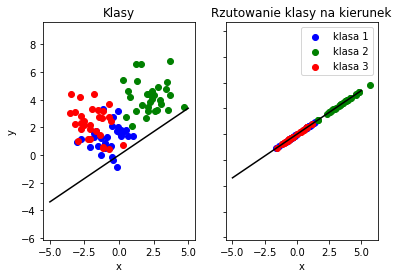

In [6]:
#importowanie potrzebnych pakietów
import numpy as np
import matplotlib.pyplot as plt

#inicjalizacja klas
N=30
S = np.array([[1,0],
              [0,1]])
    #1:
m1 = np.array([-1,1])
x1 = np.random.normal(m1[0], S[0,0], N)
y1 = np.random.normal(m1[1], S[1,1], N)

    #2:
m2 = np.array([2,4])
x2 = np.random.normal(m2[0], S[0,0], N)
y2 = np.random.normal(m2[1], S[1,1], N)

    #3:
m3 = np.array([-2,2])
x3 = np.random.normal(m3[0], S[0,0], N)
y3 = np.random.normal(m3[1], S[1,1], N)
#koniec inicjalizacji klas

#definicja funkcji do projekcji punktów na kierunek [a,b]
def project(x,y,a,b):
    c=(np.dot([x,y],[a,b])*np.dot([a,b],[a,b]))/(np.dot([a,b],[a,b])*np.dot([a,b],[a,b]))
    return c*np.array([a,b])

#poszykiwanie kierunku a:
g = 3 #liczba klas

avg = (m1 + m2 + m3)/3
B = np.array([[0,0],
             [0,0]])
for i in range(2):
    for j in range(2):
        B[i,j] = (m1[i]-avg[i])*(m1[j]-avg[j])+(m2[i]-avg[i])*(m2[j]-avg[j])+(m3[i]-avg[i])*(m3[j]-avg[j])
B = N/(g-1) * B

W = 3*N*(N-1)*S/(3*N-g)
M = np.dot(np.linalg.inv(W),B) 

from numpy import linalg as LA
w, v = LA.eig(M) #w-wartości własne; v- wektory własne dla każdej wartości własnej
max = 0
if(w[1]>w[max]): max = 1
print(v[max])

line_x = np.array([-5,5])
line_y = np.array([line_x[1]*v[max][1]/v[max][0],line_x[0]*v[max][1]/v[max][0]])

#rzutowanie
x1p, y1p = np.zeros(N), np.zeros(N)
x2p, y2p = np.zeros(N), np.zeros(N)
x3p, y3p = np.zeros(N), np.zeros(N)
for i in range(len(x1)):
    p1 = project(x1[i],y1[i],v[max][0], -v[max][1])
    x1p[i] = p1[0]
    y1p[i] = p1[1]
    p2 = project(x2[i],y2[i],v[max][0], -v[max][1])
    x2p[i] = p2[0]
    y2p[i] = p2[1]
    p3 = project(x3[i],y3[i],v[max][0], -v[max][1])
    x3p[i] = p3[0]
    y3p[i] = p3[1]
    

#wykresy
    #rysowanie klas
fig, ax = plt.subplots(1,2)
ax[0].set(xlabel='x', ylabel='y')
ax[0].set_title('Klasy')
ax[0].label_outer()

ax[0].scatter(x1,y1, c='b', label='klasa 1')
ax[0].scatter(x2,y2, c='g', label='klasa 2')
ax[0].scatter(x3,y3, c='r', label='klasa 3')
ax[0].plot(line_x,line_y, c='black')
ax[0].axis('equal')

    #rysowanie projekcji na kierunek a    
ax[1].set(xlabel='x', ylabel='y')
ax[1].set_title('Rzutowanie klasy na kierunek')
ax[1].label_outer()

ax[1].scatter(x1p,y1p, c='b', label='klasa 1')
ax[1].scatter(x2p,y2p, c='g', label='klasa 2')
ax[1].scatter(x3p,y3p, c='r', label='klasa 3')
ax[1].plot(line_x,line_y, c='black')
ax[1].axis('equal')
ax[1].legend()

s = 'Funkcja linii: y=' + repr(v[max,0]/v[max,1]) + '*x'
print('Funkcja linii: y=', -v[max,0]/v[max,1],'* x')